In [175]:
import numpy as np
import matplotlib.pyplot as plt

#перепишу резы другого блокнота чтобы не забыть
#точность сравнения флоатов - не было пока что замечено, было подсчитано прямым сравнением с квадратом радиуса
#и сравнением разницы с точностью
#коэф пирсона между массивами историй вычислений пи были либо 1 либо 0.9999999999999993
#выбор радиуса и центра - тоже не было замечено влияния, было подсчитано для 4 вариантов и коэф пирсона тоже 1
#точки на границе - было подсчитано "включая" точки на границе(сравнение<=) и не включая(<)
#тоже не было замечено влияния
#в принципе насколько я понял с учетом стандарта хранения флоатов iee 754 генерация точек от 0 до 1 самое выгодное
#еще думаю можно было бы попробовать работать на четверти окружности, по формуле /4 для круга и квадрата сократятся
#но тут все же центр 0.5 0.5 и окружность с радиусом 0.5
#так же вопрос - рандомные числа же по идее псевдорандомные, насколько велико влияние?
#вернее насколько одно из предположений верно - точки равномерно распределены
#хотя по сути то насколько приблизимся. числу пи это и покажет
#для 10000000000 иттераций значение было аппроксимировано в 3.1416034456
#признаюсь, сначала писал функцией и по иттерациям и смотрел поведение и потом только ооп
#в принципе как и ожидалось расчет нестабильный, фиксированной точности приближения к пи не гарантируется
#по аргументам - ВРОДЕ БЫ не должно ломаться при некорректном вводе(ну или не поднимать ValueError)
#попытался сгладить с большим весом у более новых подсчитанных значения пи каждые 100 элементов. эффект небольшой
#оставлю пока, надо попробавать проследить какие коэффициенты будут давать наибольший вклад положительный
#не забыть кстати - пи до 10 знака на всякий случай 3,1415926536 пусть будет тут чтобы удобнее было смотреть
#не то чтобы все эти знаки пока требовались
#гораааздо дольше вычисления
#добавлю еще один аргумент чтобы определять пытаться ли таким образом сгладить чтобы было легче тестировать
#надо не забыть еще раз перенести в новый блокнот или удалить комментарии
#надо кстати сделать читаемей 
#принтов много
#мб сгладить подсчет n значений пи...
#вообще первое значение либо 0/1 либо 1/1 
#по ощущению вообще насыщается
#надо заново по колву иттераций прогнать для простоты
#маркеры кстати дефолтно лучше 2 или 5 напрмиер а не 10
#все точно создаю новый блокнот тут комментариев больше чем кода уже
#самминг ап - ну никто не удивлен что не стабильно. картина в виде флуктуаций около значения пи прослеживается
#го кстати не добавлять первые 2-3 значения попробовать
#ну или никак их не учитывать вообще
#отвлекся
#метод нестабильный, флуктуации относительно значения, возможно зависимость от начального распределения точек - исследовать
#сглаживание - пока что результата нет
#понятно что при сглаживании надо использовать веса
#возможные варианты - сглаживать не используя начальные точки, несмотря на небольшой их вес, вклад будут вносить - дополнительно занижать/завышать
#а кстати разница между макс мином увеличивается действительно
#без отвлечений - сглаживание так же увеличивает вычислительную нагрузку(очевидно)
#исследовать зависимость между коэфами - подобрать коэф, подобрать сколько раз делать
#и подобрать с каких значений попытаться сгладить
#сколько же тетрадок
#рано или поздно я приближусь к чему-то ну хотя бы чуть подходящему
#еще не забыть - еще раз протестить что методы не ломаются 
#а еще, по сути сглаживаются уже существующие в истории значения
#а новое подсчитанное как зависит так и зависит от countов
#значение которое выдает метод конечно сглаженное на основе уже сглаженных
#эффект все равно не так сильно замечен
#все, покидаю этот блокнот, надо снова на все посмотреть 
#https://keldysh.ru/papers/2012/prep2012_21.pdf интересно
#теперь точно все






class ApproximatorMMK:
    
    """Approximate Pi using Monte-Carlo method, generates points inside a square 
    and check if they are inside its inscribed circle. 
    Argument - epsilon, tells methods after which difference between Pi values to stop computations
    """
    
    def __aver_wei(self, n, pi, eprev):
        """ Averaging out values, the last one holds more weight, 
        internal method, trying to upgrade the result
        does not need this but writing it anyway
        maybe will help to ponder about results"""
        
        try:
             float(pi)
        except ValueError:
            print('pi is not a number')
            raise ValueError()
            
        try:
             float(eprev)
        except ValueError:
            print('eprev is not a number')
            raise ValueError()
            
        try:
             int(n)
        except ValueError:
            print('n is not a number')
            raise ValueError()
        
        #just in case checking

        a = 2/(n+45)
        e = (1-a)*pi + a*eprev
        
        #current holds more weight
        
        return e
        #return pi
        
    
    def __init__(self, eps):
        
        try:
             float(eps)
        except ValueError:
            print('Epsilon is not a number')
            raise ValueError()
            
        if (eps <= 0):
            print('Epsilon is incorrect')
            raise ValueError()
            
        if (eps>1):
            print('Epsilon is more than 1, accuracy is not guaranteed')
            print()
        
        #checking if epsilon is correct
            
        
        self.epsilon = eps
        self.count_all = 0
        self.count_inside = 0
        
        #count_all - count of all points generated
        #count_inside - count of points inside circle
        
        self.check1 = False
        self.checkmany = -1
        
        #check1 - check if pi was computed before
        #checkmany - check if pi was computed n times before(if approximate_n_times was called it will not be -1)
        
        print('Depends on: Numpy, Matplotlib')
        print('Numpy imported as np, matplotlib.pyplot as plt')
        print()
        print()
        print('Available methods - approximatePI, approximate Pi 1 time')
        print()
        print('show_pi, visualize one approximation of Pi. ')
        print('Arguments - markers, default is 100, choose which markers to show(mark every arg time), ')
        print('again, bool, default is True, choose if want to approximate pi again. ')
        print('Does not require to call approximatePI previously')
        print()
        print('approximate_n_times, approximate pi n times, required argument - n, default is 100, returns n approximated pi values')
        print()
        print('show_may_pi - visualize n approximated pi values and show mean value of them,')
        print('does not require calling approximate_n_times, ')
        print('arguments - markers, default is 2, choose which markers to show,') 
        print('and again, bool, default is True, choose if you want to compute pi values again')
        print()
        print('Warning : Float n and markers will be converted to int')
        print()
        print('Not true or false values of again are treated this way: 0 is False, other is True')
        
        
    def approximatePI(self):
        
        """Approximate Pi one time, no arguments required, returns pi, a float, and history of pi, a list"""
    
        previous_pi = []
    
        check = True
        
        #previous_pi - history of pi values
        #check - bool to stop when difference between pi values will be less then epsilon
    
        while (check):
        
            x = np.random.rand()
            y = np.random.rand()
        
            if ( pow( (x-0.5), 2 ) + pow( (y-0.5), 2 ) <= 0.25):
                
                self.count_inside+=1
            
            self.count_all+=1
            
            #checking if the point is inside the circle and increasing number of points inside if yes
            #increasing number of points generated in any case
        
            temp = 4 * self.count_inside/self.count_all
            
            if (len(previous_pi) >100) and (len(previous_pi)%100 == 0):
                
                for i in range(100, len(previous_pi), 1):
                    
                       previous_pi[i]  = self.__aver_wei(i, previous_pi[i], previous_pi[i - 1])
                    
                e = self.__aver_wei(len(previous_pi), temp, previous_pi[len(previous_pi) - 1])
                previous_pi.append(e)
            
            else:
                previous_pi.append(temp)
            
            #adding current averaged pi to history
        
            if (self.count_all >= 1000) and (self.count_all%100):
                
                if ( abs(previous_pi[self.count_all-1] - previous_pi[self.count_all-2]) < abs(self.epsilon) ):
                    
                    check = False
                    
            #checking difference between neighboor values after number of iterations is more then 1000
            #and stopping(check = False) if yes
                    
        self.history = previous_pi
        self.pi = previous_pi[len(previous_pi)-1]
        #print(temp-e)
        
        #adding history and approximated pi to this exemplar of class
        
        self.check1 = True
        
        #pi was approximated once
        
        self.count_all = 0
        self.count_inside = 0
        
        #nullify counts
        
        #returning pi and history
        
        return temp, previous_pi
    
    def show_pi(self, markers = 100, again = True):
        
        """ Visualize one iteration of pi calculations, 
        argument - markers, integer, default is 100, specifies which points to mark, 
        again, bool, default is True, choose if you want to compute pi again, 
        returns nothing, but saves the graph as pi_mmk.png
        """
        try:
             int(markers)
        except ValueError:
            print('Markers is not a number')
            raise ValueError()
        
        if (markers <= 0):
            print('Markers is incorrect')
            raise ValueError()
            
        try:
             bool(again)
        except ValueError:
            print('Again is not a bool')
            raise ValueError()    
            
        #checking if arguments are correct
        
        if (self.check1 == False):
            pi, history = self.approximatePI()
            if again == False:
                print('Approximation was not done before, approximating anyway')
                
        elif again == False:
            pi = self.pi
            history = self.history
            
        else:
            pi, history = self.approximatePI()
            
        if (markers > len(self.history)):
            print('Markers is higher than the number of iterations, using 100 instead')
            markers = 100
            
        #based on internal check and on again either approximate pi again or use already approximated values
        
        print('Approximated value of Pi: ', pi)
        print('Number of iterations: ', len(history))
        
        plt.figure(figsize=(8,6)) 
        
        plt.plot([ i for i in range(len(history))], history, color = 'red' , marker = 'o', markevery = [markers*i for i in range(len(history[0::markers]))], markerfacecolor='c', markersize = 5)

        plt.ylim(2,4)
        
        #limits for axis y

        plt.ylabel('Pi value')
        plt.xlabel('Iteration')
        
        #some other minor customisations of the plot
        
        plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 5, width =1, color = 'k', zorder = 1, grid_color ='k', grid_alpha =0.8, grid_linewidth = 0.5)
        plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 2, width =1, color = 'gray', zorder = 1,  grid_color ='gray', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

        plt.minorticks_on()

        plt.grid(b = True, which = 'both', axis = 'both')

        plt.title('History of Pi values', loc = 'center')
        
        plt.savefig('pi_mmk.png', dpi = 450)
        
    def approximate_n_times(self, n = 10):
        
        """ Approximate pi n times, argument - n, integer, default is 10"""
        
        try:
             int(n)
        except ValueError:
            print('n is not a number')
            raise ValueError()
            
        n = int(n)
        
        if (n <= 0):
            print('n is incorrect')
            raise ValueError()
        
        #checking if arguments are correct
        
        approximated_pi = []
        
        #list for approximated pi values
        
        for i in range(n):
            pi, hist = self.approximatePI()
            approximated_pi.append(pi)
        
        #approximating pi n times and adding values to the list
        
        self.approximated_pi =  approximated_pi
        self.checkmany = n
        
        #saving list of pi values and checking that pi was indeed calculated n times, saving that n
        #returning list of approximated values
        
        return approximated_pi
    
    def show_many_pi(self, n = 10, again = True, markers = 2):
        
        """Visualize n aproximations of pi, 
        arguments - n, integer,default is 10, how many times to approximate pi, 
        markers,integer, default is 2  - choose which itesrations to mark, 
        and again,bool, default is True - choose if you want to compute pi n times again, 
        does not return anything, but saves graph as many_pi_mmk.png"""
        
        try:
             int(markers)
        except ValueError:
            print('Markers is not a number')
            raise ValueError()
            
        markers = int(markers)
        
        if (markers <= 0):
            print('Markers is incorrect')
            raise ValueError()
        
            
        try:
             bool(again)
        except ValueError:
            print('Again is not a bool')
            raise ValueError() 
            
        try:
             int(n)
        except ValueError:
            print('n is not a number')
            raise ValueError()
            
        n = int(n)
        
        if (n <= 0):
            print('n is incorrect')
            raise ValueError()
            
        #checking if arguments are correct
        
        if (self.checkmany != -1) and (again == False):
            many_pi = self.approximated_pi
            if (self.checkmany != n):
                print( 'Number of previous approximations is not {0}, previous {1} approximations were used instead'.format(n, self.checkmany) )
        else:
            many_pi = self.approximate_n_times(n)
        
        if (markers > len(self.approximated_pi)):
            print('Markers is higher than the number of iterations, using 10 instead')
            markers = 10
            
        #checking if pi was approximated n times before and either using these values
        #and warning if given n does not match there quantity
        #or approximating pi n times again
        
        plt.figure(figsize=(8,6)) 
        
        plt.plot([ i for i in range(len(many_pi))], many_pi, color = 'red', marker = 'o', markevery = [markers*i for i in range(len(many_pi[0::markers]))], markerfacecolor='c', markersize = 5 )
        
        m = np.array(many_pi)
        
        #for stats

        plt.ylabel('Pi value')
        plt.xlabel('Time calculated')
        
        #some customisations here
        
        plt.tick_params(axis = 'both', which = 'major', reset = True, direction = 'out', length = 5, width =1, color = 'k', zorder = 1, grid_color ='k', grid_alpha =0.8, grid_linewidth = 0.5)
        plt.tick_params(axis = 'both', which = 'minor', reset = True, direction = 'out', length = 2, width =1, color = 'gray', zorder = 1,  grid_color ='gray', grid_alpha =0.6, grid_linewidth = 0.5, grid_linestyle = '--')

        plt.minorticks_on()

        plt.grid(b = True, which = 'both', axis = 'both')

        plt.title('Many approximated pi', loc = 'center')
        
        plt.savefig('many_pi_mmk.png', dpi = 450)
        
        #printing some stats
        
        print("Mean pi {:-f}, median {:-f}".format(np.mean(m), np.median(m)))
        print("Max pi {:-f}, min {:-f}, range {:-f}".format(np.max(m), np.min(m), np.ptp(m)))
        print("Standart deviation pi {:-f}, variance {:-f}".format(np.std(m), np.var(m)))
    def mean_pi(self):
        if self.checkmany == -1 and self.check1 == False:
            print('No previous approximations')
        elif self.checkmany!=-1:
            print(np.mean(np.array(self.approximated_pi)))
        elif self.check1 == True:
            print('Only one time pi was approximated, the value is: ', self.pi)
            

In [180]:
a = ApproximatorMMK(0.00001)

Depends on: Numpy, Matplotlib
Numpy imported as np, matplotlib.pyplot as plt


Available methods - approximatePI, approximate Pi 1 time

show_pi, visualize one approximation of Pi. 
Arguments - markers, default is 100, choose which markers to show(mark every arg time), 
again, bool, default is True, choose if want to approximate pi again. 
Does not require to call approximatePI previously

approximate_n_times, approximate pi n times, required argument - n, default is 100, returns n approximated pi values

show_may_pi - visualize n approximated pi values and show mean value of them,
does not require calling approximate_n_times, 
arguments - markers, default is 10, choose which markers to show,
and again, bool, default is True, choose if you want to compute pi values again


Not true or false values of again are treated this way: 0 is False, other is True


Approximated value of Pi:  3.1503966479131846
Number of iterations:  84962


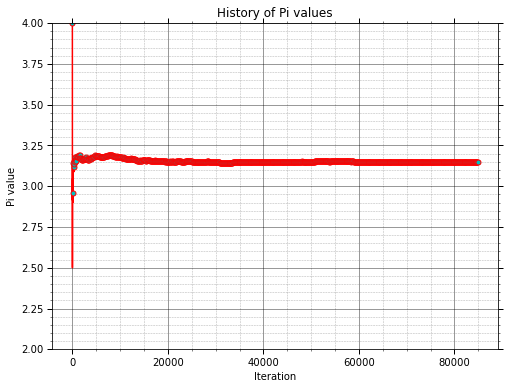

In [181]:
a.show_pi()

Approximated value of Pi:  3.1287583199449163
Number of iterations:  8714


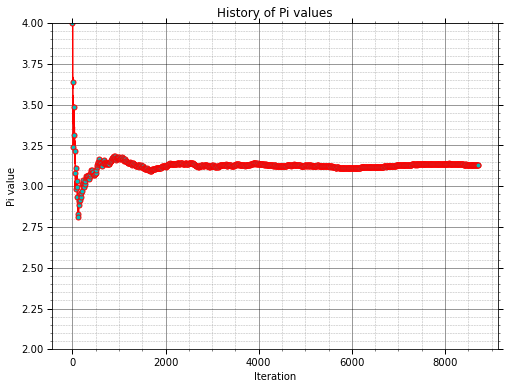

In [132]:
a.show_pi(markers = 10, again = False)

In [133]:
help(ApproximatorMMK)

Help on class ApproximatorMMK in module __main__:

class ApproximatorMMK(builtins.object)
 |  ApproximatorMMK(eps)
 |  
 |  Approximate Pi using Monte-Carlo method, generates points inside a square 
 |  and check if they are inside its inscribed circle. 
 |  Argument - epsilon, tells methods after which difference between Pi values to stop computations
 |  
 |  Methods defined here:
 |  
 |  __init__(self, eps)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  approximatePI(self)
 |      Approximate Pi one time, no arguments required, returns pi, a float, and history of pi, a list
 |  
 |  approximate_n_times(self, n=10)
 |      Approximate pi n times, argument - n, integer, default is 10
 |  
 |  mean_pi(self)
 |  
 |  show_many_pi(self, n=10, again=True, markers=10)
 |      Visualize n aproximations of pi, 
 |      arguments - n, integer,default is 10, how many times to approximate pi, 
 |      markers,integer,  - choose which itesrations to mark, 
 |   

Mean pi 3.143389, median 3.141227
Max pi 3.178102, min 3.112413, range 0.065689
Standart deviation pi 0.016210, variance 0.000263


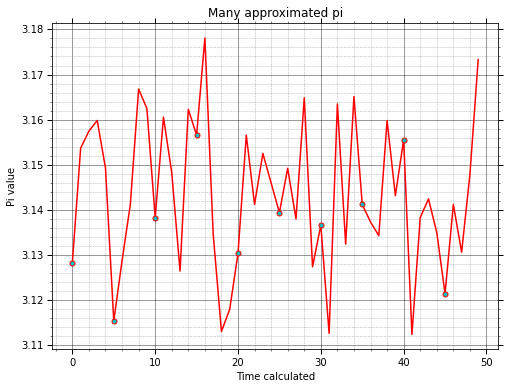

In [179]:
a.show_many_pi(n=50, markers = 5)

In [174]:
a.mean_pi()

3.1450103048043827


Mean pi 3.139783, median 3.139533
Max pi 3.150967, min 3.133473, range 0.017494
Standart deviation pi 0.004417, variance 0.000020


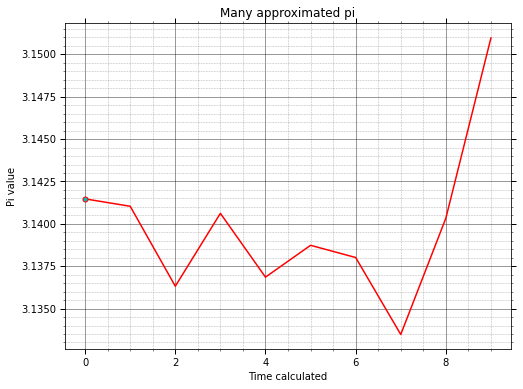

In [182]:
a.show_many_pi(n=10)

In [8]:
b = ApproximatorMMK(0)

Epsilon is incorrect


ValueError: 

In [9]:
b = ApproximatorMMK(-1)

Epsilon is incorrect


ValueError: 

In [10]:
b = ApproximatorMMK('something')

Epsilon is not a number


ValueError: 

In [138]:
b = ApproximatorMMK(2)

Epsilon is more than 1, accuracy is not guaranteed

Depends on: Numpy, Matplotlib
Numpy imported as np, matplotlib.pyplot as plt


Available methods - approximatePI, approximate Pi 1 time

show_pi, visualize one approximation of Pi. 
Arguments - markers, default is 100, choose which markers to show(mark every arg time), 
again, bool, default is True, choose if want to approximate pi again. 
Does not require to call approximatePI previously

approximate_n_times, approximate pi n times, required argument - n, default is 100, returns n approximated pi values

show_may_pi - visualize n approximated pi values and show mean value of them,
does not require calling approximate_n_times, 
arguments - markers, default is 10, choose which markers to show,
and again, bool, default is True, choose if you want to compute pi values again


Not true or false values of again are treated this way: 0 is False, other is True


In [139]:
b.show_pi(markers = 'string')

Markers is not a number


ValueError: 

1.6173458212698222e-06
Approximation was not done before, approximating anyway
Approximated value of Pi:  3.180819180819181
Number of iterations:  1001


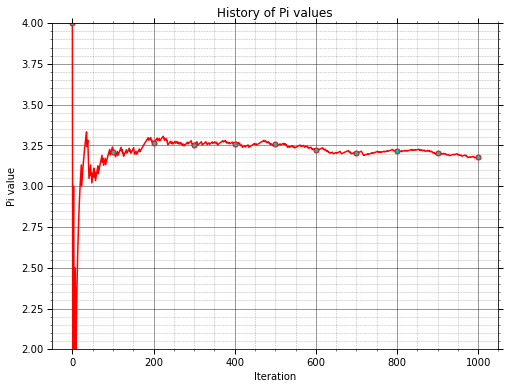

In [140]:
b.show_pi(again = 0)

In [141]:
b.approximate_n_times(10.1)

1.491113952312162e-06
-6.114573579907301e-06
1.7199091537634104e-06
1.9565939695098677e-06
1.8461410840053816e-06
1.6646827112332119e-06
1.6725722638000207e-06
1.5226719196625993e-06
-6.1382113010211015e-06
1.696240739423871e-06


[3.2447552447552446,
 3.104895104895105,
 3.128871128871129,
 3.008991008991009,
 3.064935064935065,
 3.156843156843157,
 3.1528471528471527,
 3.2287712287712287,
 3.116883116883117,
 3.1408591408591406]

In [142]:
b.approximate_n_times('s')

n is not a number


ValueError: 

-5.988311017279813e-06
Markers is higher than the number of iterations, using 100 instead
Approximated value of Pi:  3.040959040959041
Number of iterations:  1001


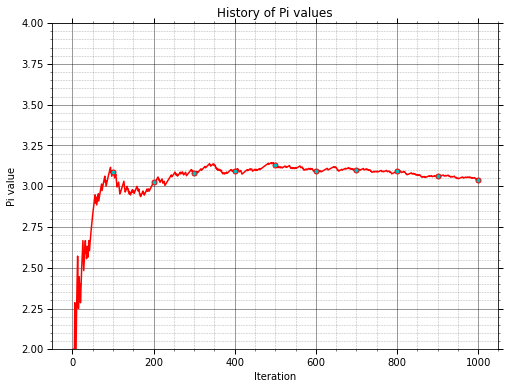

In [143]:
b.show_pi(markers = 10000000)

Number of previous approximations is not 50, previous 10 approximations were used instead
Mean pi 3.134865, median 3.134865
Max pi 3.244755, min 3.008991, range 0.235764
Standart deviation pi 0.066128, variance 0.004373


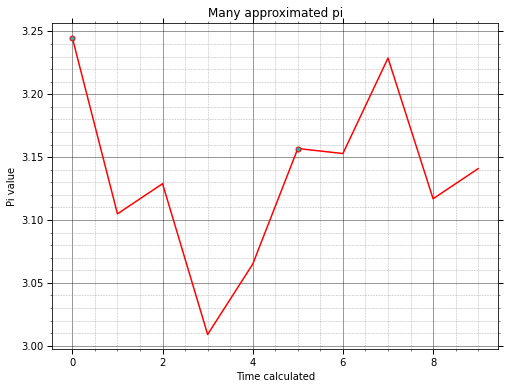

In [144]:
b.show_many_pi(n=50, markers = 5, again =False)